In [7]:
#import
import numpy as np # linear algebra
import pandas as pd
import re 
import nltk 
from sklearn.feature_extraction.text import CountVectorizer

import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
#overview the data
df1 = pd.read_csv('D:/ML_data_sql/news/True.csv')
df2 = pd.read_csv('D:/ML_data_sql/news/Fake.csv')
df1['label'] = 1
df2['label'] = 0
df = pd.concat([df1, df2], axis=0)

del df1 
del df2
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [10]:
data = pd.get_dummies(df,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1,0,0,0,0,0,0,1,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1,0,0,0,0,0,0,1,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1,0,0,0,0,0,0,1,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1,0,0,0,0,0,0,1,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1,0,0,0,0,0,0,1,0


In [11]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 1.7+ MB


In [12]:
#natural language processsing 
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()

for txt in data.text:
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_text.append(txt)
    
new_text[0]

'washington reuters the head of a conservative republican faction in the u s congress who voted this month for a huge expansion of the national debt to pay for tax cut called himself a fiscal conservative on sunday and urged budget restraint in in keeping with a sharp pivot under way among republican u s representative mark meadow speaking on cbs face the nation drew a hard line on federal spending which lawmaker are bracing to do battle over in january when they return from the holiday on wednesday lawmaker will begin trying to pas a federal budget in a fight likely to be linked to other issue such a immigration policy even a the november congressional election campaign approach in which republican will seek to keep control of congress president donald trump and his republican want a big budget increase in military spending while democrat also want proportional increase for non defense discretionary spending on program that support education scientific research infrastructure public h

In [13]:
new_title = []
for txt in data.title:
    
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_title.append(txt)
new_title[0]

'a u s budget fight loom republican flip their fiscal script'

In [14]:
#creating sparce matrixes
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray() 
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


In [15]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 1.0 MB


In [16]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [18]:
#create X and Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)
print(x.shape) # 5008
print(y.shape)

(44898, 5008)
(44898,)


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)

In [20]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__() # Inhertiting
        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1
        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()
        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT 

    def forward(self,x):
        out = self.linear1(x) # Input Layer 
        out = self.relu1(out)
        out = self.linear2(out) # Hidden Layer 1 
        out = self.relu2(out)
        out = self.linear3(out) # Hidden Layer 2 
        out = self.relu3(out)
        out = self.linear4(out) # Hidden Layer 3 
        out = self.relu4(out)
        out = self.linear5(out) # Output Layer
        return out
    
model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

In [21]:
#train
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

In [22]:
EPOCHS = 20

for epoch in range(EPOCHS):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward Propagation
    outs = model(X_train)
    
    # Computing Loss
    loss = error(outs,Y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 0.6966835856437683
Loss after iteration 1 is 4.304051399230957
Loss after iteration 2 is 0.9626540541648865
Loss after iteration 3 is 0.7493709325790405
Loss after iteration 4 is 0.6118916273117065
Loss after iteration 5 is 0.7891976237297058
Loss after iteration 6 is 0.478047639131546
Loss after iteration 7 is 0.5585957765579224
Loss after iteration 8 is 0.36810025572776794
Loss after iteration 9 is 0.4113313555717468
Loss after iteration 10 is 0.3271370828151703
Loss after iteration 11 is 0.20924752950668335
Loss after iteration 12 is 0.2074936330318451
Loss after iteration 13 is 0.2108602076768875
Loss after iteration 14 is 0.14818793535232544
Loss after iteration 15 is 0.11358180642127991
Loss after iteration 16 is 0.10639120638370514
Loss after iteration 17 is 0.08466185629367828
Loss after iteration 18 is 0.05859895050525665
Loss after iteration 19 is 0.04712054505944252


tensor([-2.7808,  7.0310], grad_fn=<SelectBackward>)
tensor(1)
Model accuracy is  0.9873496659242762


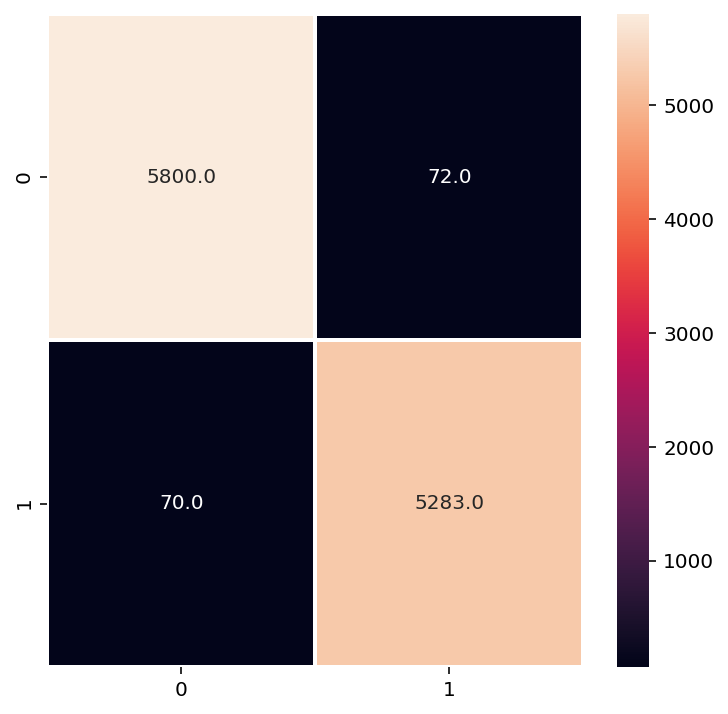

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()